# Linear Regression, Sum of Least Squares, Polynomial Regression

Suppose I have a bunch of data points that look like it follows a linear pattern. For this first example, we will look at the function __y = 3x + 1__.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = np.random.normal(1, 1.5, 100)
noise = np.random.normal(0, 3, 100)
Y = (3 * X + 1) + noise

PerfectX = np.arange(min(X), max(X), 0.1)
PerfectY = 3 * PerfectX + 1

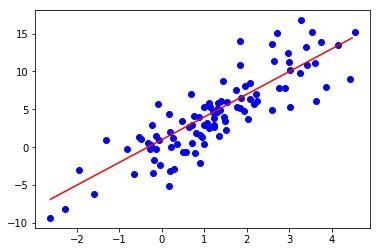

In [23]:
plt.plot(X, Y, 'bo')
plt.plot(PerfectX, PerfectY, 'r')

After making the assumption that this pattern is linear, I want to see if I can estimate the values of m and B (general form is Y = B1X + B0) so that it follows this pattern.